In [ ]:
import numpy as np
import math

The equation we are testing is

$$
\begin{cases}
u'(x) + u(x) = x, \qquad\text{for}\; 0<x<1,\\
u(0) = 1.
\end{cases}
$$ 

The exact solution is
$$ u^*(x) = x-1+2e^{-x}.$$



---

The idea of the paper is, assume $$u = \mathrm{NN}(x).$$
We minimize the loss function
$$ L(\hat{u}) = \mathrm{Mean}\left(\left\Vert \frac{d\hat{u}}{dx} + \hat{u} -x\right\Vert^2\right) + |\hat{u}(0)-1|^2 $$
where all the derivatives are computed via 
* back-propagation - we tried this idea but it does not work well, maybe autograd in Pytorch does not perform it well, or the idea behind it is problematic, in the sense that the derivative obtained by back-propagation with second-order is not very nice.
* finite difference scheme

In [ ]:
# Import libraries
from numpy import linalg
import pandas as pd
# !pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable

import torch.nn.init as init
from torch import autograd

from torch import nn, optim
from time import time

In [ ]:
def u_star_func(x):
    result = x-1+2*np.exp(-x)
    return result

In [ ]:
# Discritize the interval
a = 0
b = 1
step = (b-a)/100
x_init_np = np.arange(start=a, stop=b+step, step=step)

In [ ]:
def Loss(u_hat, first_derivative_u_hat, x_data):
    # all inputs are n-dim pytorch tensors
    loss = nn.MSELoss()
    result = loss(first_derivative_u_hat[1:-1] + u_hat[1:-1] , x_data[1:-1]) + torch.pow(u_hat[0]-1,2) 
    return result

In [ ]:
# u = sigma(W4(sigma(W3... x)))

input_size = 1
output_size = 1
k = 10
model = nn.Sequential(nn.Linear(input_size, k),
                      nn.Tanh(),

                      nn.Linear(k, output_size),
                      nn.Tanh(),

                      )
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Tanh()
)


In [ ]:
x_init_np = np.arange(start=a, stop=b, step=step)
x_init = torch.tensor(x_init_np, requires_grad= True)
# print(x_init)
print(x_init.shape)

torch.Size([100])


In [ ]:
import matplotlib.pyplot as plt
def draw_result(lst_iter, lst_loss, title='Loss'):
    plt.plot(lst_iter, lst_loss, '-b', label='loss')
    
    plt.xlabel("n iteration")
    plt.legend(loc='upper left')
    plt.title(title)

    # save image
    plt.savefig(title +".png")  # should before show method

    # show
    plt.show()

# plt.plot(test_error_vec)
# plt.show()


def draw_graph(lst_iter, lst_loss, lst_acc, title):
    plt.plot(lst_iter, lst_loss, '-b', label='true')
    plt.plot(lst_iter, lst_acc, '-r', label='neural network')

    plt.xlabel("x")
    plt.legend(loc='upper left')
    plt.title(title)

    # save image
    plt.savefig(title+".png")  # should before show method

    # show
    plt.show()

In [ ]:
def run_train(lr = 0.001, num_e = 1000):
    # optimizer = optim.SGD(model.parameters(), lr=0.07, momentum=3.0)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    time0 = time()
    num_e = num_e
    iter = []
    test_error_vec = []
    
    for e in range(num_e):
        running_loss = 0
        
        optimizer.zero_grad()  # call zero_Grad
        
        u_hat = torch.tensor(np.array([]))
        for x in x_init_np:
            x_tensor = torch.tensor(np.array([x]), requires_grad= True)
            temp = model(x_tensor.float())
            u_hat = torch.hstack([u_hat, temp])
        d1u_hat = u_hat.clone()    
        d1u_hat[1:-1] = (-u_hat[0:-2] + u_hat[2:])/(2*step)
        loss = Loss(u_hat,d1u_hat,x_init)

        loss.backward()
        optimizer.step() 

        running_loss += loss.clone().item()    
        if (e % 10 == 0):
            print(f"The running loss at {e+1} iteration is: {running_loss}")
        test_error_vec.append(running_loss)
        iter.append(e)

    draw_result(iter, test_error_vec)

    y_true = u_star_func(x_init_np)
    draw_graph(x_init_np, y_true, u_hat.clone().detach().numpy(), 'Solutions')
    print(np.mean(np.square(y_true -  u_hat.clone().detach().numpy())))

The running loss at 1 iteration is: 1.4944181581657534
The running loss at 11 iteration is: 0.22208906510227414
The running loss at 21 iteration is: 0.11584321923755589
The running loss at 31 iteration is: 0.07101248856190256
The running loss at 41 iteration is: 0.02968542859449012
The running loss at 51 iteration is: 0.01993116422225473
The running loss at 61 iteration is: 0.015845936322937054
The running loss at 71 iteration is: 0.014808093310872985
The running loss at 81 iteration is: 0.014336811334425641
The running loss at 91 iteration is: 0.013926746204489946
The running loss at 101 iteration is: 0.013629131497013702
The running loss at 111 iteration is: 0.013349461178052302
The running loss at 121 iteration is: 0.01308864160356105
The running loss at 131 iteration is: 0.012819846890860069
The running loss at 141 iteration is: 0.012533688725001164
The running loss at 151 iteration is: 0.012222046265829858
The running loss at 161 iteration is: 0.011876838380550158
The running loss

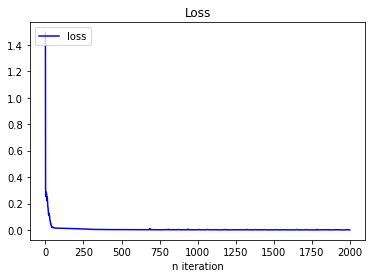

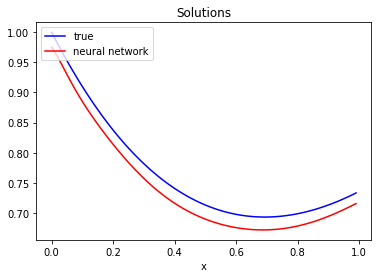

0.0005036170820984121
The running loss at 1 iteration is: 0.0013146071625345567
The running loss at 11 iteration is: 0.0022227620245612078
The running loss at 21 iteration is: 0.0014911711499621177
The running loss at 31 iteration is: 0.0011008813514197442
The running loss at 41 iteration is: 0.0009689774395595496
The running loss at 51 iteration is: 0.0009179836862009307
The running loss at 61 iteration is: 0.0008882257917540051
The running loss at 71 iteration is: 0.000876028268316733
The running loss at 81 iteration is: 0.0008710147652589692
The running loss at 91 iteration is: 0.0008634381499415697
The running loss at 101 iteration is: 0.0008574555954502347
The running loss at 111 iteration is: 0.0008512200102813635
The running loss at 121 iteration is: 0.0008451915825267192
The running loss at 131 iteration is: 0.0008392025032835396
The running loss at 141 iteration is: 0.0008332570670289057
The running loss at 151 iteration is: 0.00082732622442674
The running loss at 161 iteratio

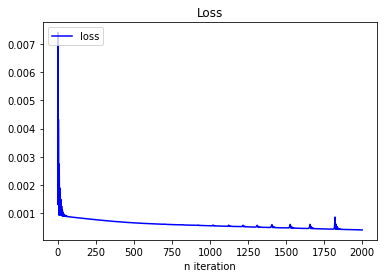

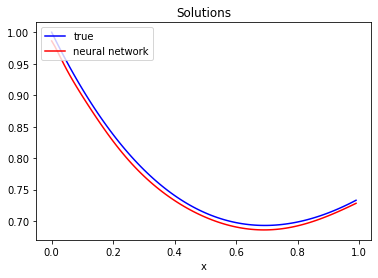

7.09656486932328e-05
The running loss at 1 iteration is: 0.0004087803697189748
The running loss at 11 iteration is: 0.00041491238713610456
The running loss at 21 iteration is: 0.0004081253983588853
The running loss at 31 iteration is: 0.0004084981445486987
The running loss at 41 iteration is: 0.0004075613970815437
The running loss at 51 iteration is: 0.00040705673495415503
The running loss at 61 iteration is: 0.00040672732681962227
The running loss at 71 iteration is: 0.0004063832002129203
The running loss at 81 iteration is: 0.0004060275074558525
The running loss at 91 iteration is: 0.0004056308984228045
The running loss at 101 iteration is: 0.0004052310942131344
The running loss at 111 iteration is: 0.0004048201464078808
The running loss at 121 iteration is: 0.00040438712045101725
The running loss at 131 iteration is: 0.0004039546105837277
The running loss at 141 iteration is: 0.0004034830984503807
The running loss at 151 iteration is: 0.00040300163645134903
The running loss at 161 i

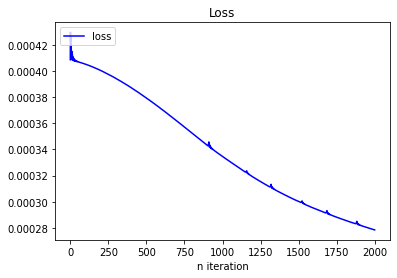

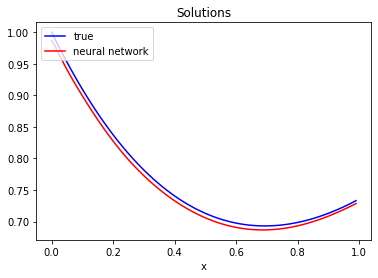

6.256487283441884e-05
Time = 192.21327805519104


In [ ]:
time0 = time()
run_train(lr=0.1, num_e= 2000)
run_train(lr=0.01, num_e= 2000)
run_train(lr=0.001, num_e= 2000)
print(f"Time = {time() - time0}")

In [ ]:
# run_train(lr=0.005, num_e= 1000)
# run_train(lr=0.005, num_e= 1000)
# run_train(lr=0.005, num_e= 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# save weights
filepath = '/content/drive/My Drive/Colab Notebooks/Project_PINNs/weight_working_ex02-finite-difference-mod01.txt'
torch.save(model.state_dict(), filepath)

In [ ]:
# #Later to restore:
model.load_state_dict(torch.load(filepath))
model.eval()

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Tanh()
)

In [ ]:
def evaluate_np(x_data_np):
    u_hat = []
    for x in x_data_np:
        x_tensor = torch.tensor(np.array([x]), requires_grad= True)
        temp = model(x_tensor.float())
        u_hat.append(temp.clone().item())
    return u_hat

In [ ]:
def evaluate_error_np(x_data_np):
    y_pred = evaluate_np(x_data_np)
    y_true = u_star_func(x_data_np)
    return np.mean(np.square(y_true -  y_pred))

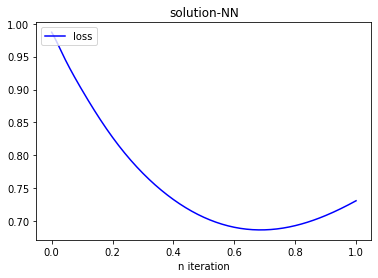

6.196864891391577e-05

In [ ]:
x_init_np2 = np.arange(start=a, stop=b+step/2, step=step/2)
x_init2 = torch.tensor(x_init_np2, requires_grad= True)
y_pred2 = evaluate_np(x_init_np2)
draw_result(x_init_np2, y_pred2, 'solution-NN')
evaluate_error_np(x_init_np2)

In [ ]:
step_size = []
error = []
for k in [4,6,8,10,12, 14, 26]:
    x_vec = np.arange(start=a, stop=b+step/k, step=step/k)
    y_pred = evaluate_np(x_vec)
    error.append(evaluate_error_np(x_vec))
    step_size.append(step/k)

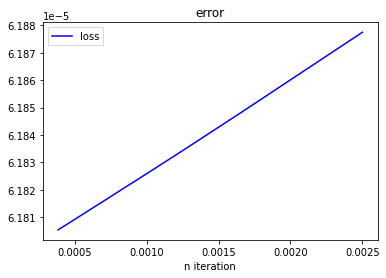

[0.0025, 0.0016666666666666668, 0.00125, 0.001, 0.0008333333333333334, 0.0007142857142857143, 0.0003846153846153846]


In [ ]:
draw_result(step_size[::-1], error[::-1], 'error')
print(step_size)

# Appendix: Understanding pytorch gradient

We create two vectors

$$a = \begin{bmatrix} {2\\3}
\end{bmatrix}, \qquad\text{and}\qquad b = \begin{bmatrix} {6\\4}
\end{bmatrix}$$

Let us consider the function

$$ Q(x,y) = 3x^3 - y^2$$

The convention here is that, if 
$$\mathbf{x} = \begin{bmatrix} {x_1\\x_2\\ \vdots\\ x_n}
\end{bmatrix} \qquad\text{and}\qquad \mathbf{y} = \begin{bmatrix} {y_1\\y_2\\ \vdots\\ y_n}
\end{bmatrix}$$
then
the action of $Q$ on $\mathbf{x}, \mathbf{y}$ are component-wise, i.e.,

$$ Q(\mathbf{x},\mathbf{y}) = \begin{bmatrix} {Q(x_1,y_1)\\ Q(x_2,y_2)\\ \vdots\\ Q(x_n,y_n)}
\end{bmatrix} $$

In `pytorch`, this is saved as a tensor object.